C:\Users\Nstan\AppData\Local\Temp\ipykernel_16424\3495162662.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temperature_df = pd.read_sql(sql_query, dbConnection)


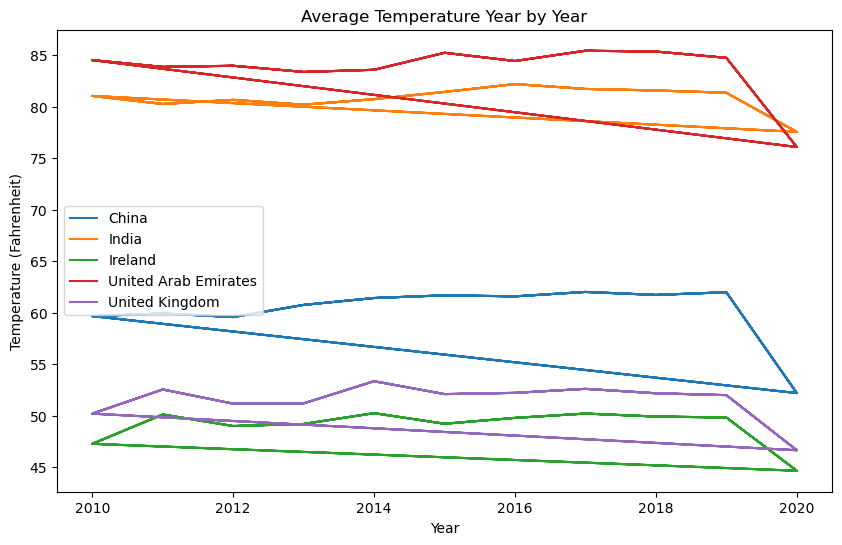

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

# Connect to the PostgreSQL database
dbConnection = psycopg2.connect(user='dap',
                                password='dap',
                                host='192.168.56.30',
                                port='5432',
                                database='climate')

# SQL query to retrieve data
sql_query = "SELECT * FROM global_temperature"

# Read data from the database
temperature_df = pd.read_sql(sql_query, dbConnection)

# Close the database connection
dbConnection.close()

# Convert 'year' and 'average_temperature' to numeric
temperature_df['year'] = pd.to_numeric(temperature_df['year'], errors='coerce')
temperature_df['average_temperature'] = pd.to_numeric(temperature_df['average_temperature'], errors='coerce')

# Filter the data by the list of countries
countries = ['Ireland', 'United Kingdom', 'China', 'United Arab Emirates', 'India', 'USA']
filtered_df = temperature_df[temperature_df['country'].isin(countries)]

# Add a year filter for 2010-2022
filtered_df = filtered_df.query('2010 <= year <= 2022')

# Create a time series plot
plt.figure(figsize=(10, 6))

for country, data in filtered_df.groupby('country'):
    plt.plot(data['year'], data['average_temperature'], label=country)

plt.title('Average Temperature Year by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.show()